In [1]:
#%config Completer.use_jedi = False

In [23]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [9]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: cycler>=0.10.0 in d:\anaconda\lib\site-packages (from yellowbrick) (0.10.0)



In [10]:
from yellowbrick.cluster import KElbowVisualizer

In [12]:
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

***
___

In [13]:
X = data.data

### 1. Entrene en un modelo de k-means, ¿cuál es el número de clusters óptimo?

In [108]:
kmeans = KMeans().fit(X)
kmeans.labels_

array([0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 7, 6, 0, 0, 0, 0, 0, 0, 6, 7,
       7, 7, 7, 7, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 6, 6, 6, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3,
       3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 5,
       3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0,
       0, 7, 0, 0, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 6, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7,
       6, 7, 0, 7, 6, 6, 6, 0, 0, 0, 0, 0, 7, 7, 7,

In [27]:
data2 = data.copy()


In [28]:
data2['Kmeans'] = kmeans.labels_

In [29]:
collections.Counter(data2['Kmeans']) #4 cluster

Counter({2: 268, 0: 98, 3: 38, 1: 102})

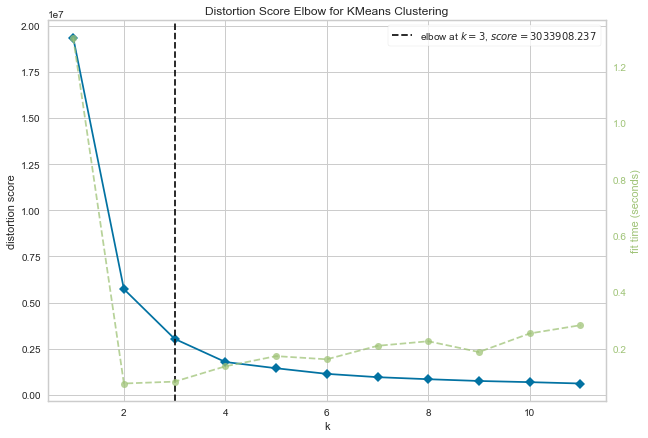

In [109]:
%matplotlib inline 
visualizer = KElbowVisualizer(kmeans,  k=(1, 12))
fig = plt.figure(figsize=(10,7))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  
plt.show()


### 2. entrene un modelo de clustering jerárquico, ¿cuántos clusters obtiene con  un enlace ward, complete, average y single, respectivamente?

In [31]:
links = ['ward','complete','average','single']

2
2
2
2


In [116]:
clustering_jer = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(X)
clustering_jer.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

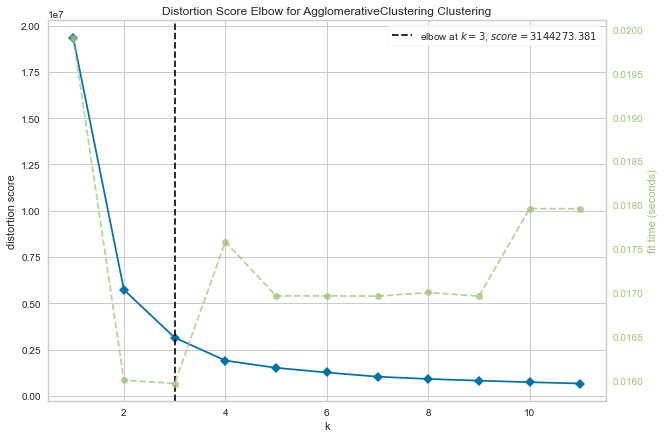

In [115]:
visualizer = KElbowVisualizer(clustering_jer, k=(1,12))
# WARD:3
#comlete: 5
#average: 3
#:single:2
fig = plt.figure(figsize=(10,7))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  
plt.show()

### 3. Reduzca la dimensión de la base de datos, escoja los 7 componentes principales, entre un modelo de clustering jerárquico, un modelo de k means y un modelo de propagación de afinidad, mencione cuántos clusters obtuvo en cada modelo

> nota, no hiperparametrice los modelos

In [82]:
pca = PCA(n_components=7).fit(X)
X_pca = pca.fit_transform(X)


In [95]:
modelo1 = AgglomerativeClustering().fit(X_pca)
modelo2 = KMeans().fit(X_pca)
modelo3 = AffinityPropagation(random_state=14).fit(X_pca)

print('Clusters del modelo 1: ', modelo1.n_clusters_)
print('Clusters del modelo 2: ',modelo2.n_clusters)
print('Clusters del modelo 3: ',modelo3.cluster_centers_.shape[0])

Clusters del modelo 1:  2
Clusters del modelo 2:  8
Clusters del modelo 3:  17
